### TensorFlow & Keras

In [165]:
# !pip install tensorflow

In [166]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [167]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [168]:
X_train.shape

(60000, 28, 28)

In [169]:
y_train.shape

(60000,)

In [170]:
y_train[1]

0

In [171]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

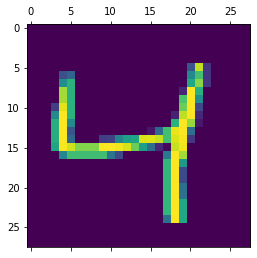

In [172]:
plt.matshow(X_train[2]);

In [173]:
y_train[2]

4

In [174]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [175]:
X_train = X_train / 255
X_test = X_test / 255

In [176]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [177]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [178]:
X_test_flattened.shape

(10000, 784)

In [179]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer = "adam", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4707 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9257


In [180]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9260


[0.26726680994033813, 0.9259999990463257]

In [181]:
y_preds = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


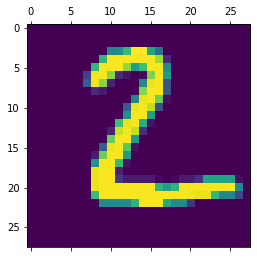

In [182]:
plt.matshow(X_test[1]);

In [183]:
y_preds[1]

array([3.0652443e-01, 5.3946618e-03, 9.9964631e-01, 3.1023309e-01,
       1.0747596e-09, 8.8628834e-01, 8.5833937e-01, 1.1700661e-12,
       1.7300302e-01, 1.9423743e-09], dtype=float32)

In [184]:
np.argmax(y_preds[1])

2

In [185]:
y_preds_labels = [np.argmax(i) for i in y_preds]
y_preds_labels[:5]

[7, 2, 1, 0, 4]

In [186]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    3,    2,    0,    4,    6,    2,    2,    0],
       [   0, 1108,    3,    2,    0,    2,    4,    2,   14,    0],
       [   3,    7,  937,   13,    9,    3,   10,    8,   39,    3],
       [   3,    0,   24,  916,    1,   25,    2,    9,   24,    6],
       [   2,    1,    5,    1,  928,    0,    8,    3,   10,   24],
       [   9,    2,    5,   34,   12,  770,   13,    5,   37,    5],
       [  10,    3,    9,    1,    8,   14,  908,    2,    3,    0],
       [   1,    5,   27,    6,   10,    1,    0,  943,    3,   32],
       [   6,    6,    7,   16,    9,   21,    8,    9,  885,    7],
       [   9,    6,    2,    9,   44,    6,    0,   17,   12,  904]])>

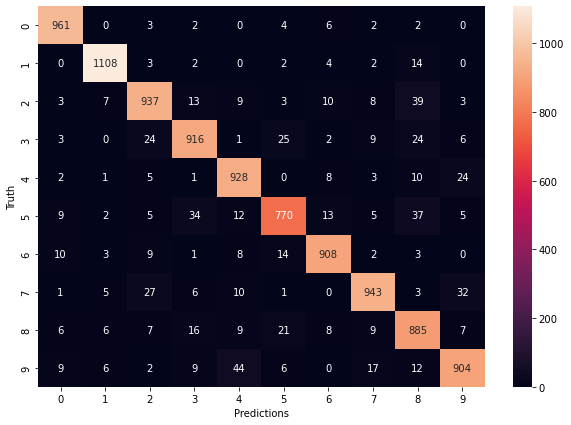

In [187]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predictions")
plt.ylabel("Truth");

In [188]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer = "adam", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2769 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9837


In [189]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9757


[0.07855124771595001, 0.9757000207901001]

313/313 [==============================] - 1s 1ms/step


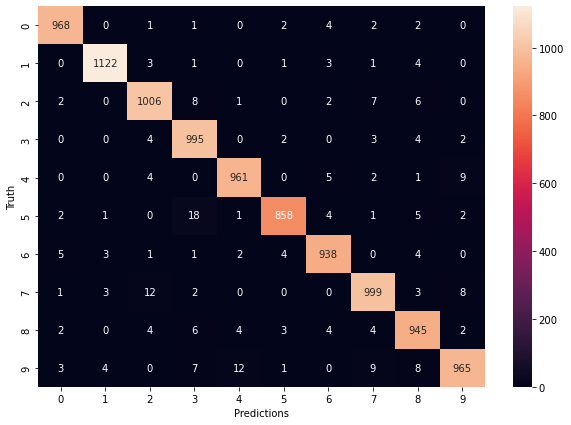

In [190]:
y_preds = model.predict(X_test_flattened)
y_preds_labels = [np.argmax(i) for i in y_preds]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predictions")
plt.ylabel("Truth");

## Activation Functions

### Sigmoid Function

In [191]:
import math

In [192]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [193]:
sigmoid(100)

1.0

In [194]:
sigmoid(1)

0.7310585786300049

In [195]:
sigmoid(-33)

4.658886145103376e-15

In [196]:
sigmoid(0.5)

0.6224593312018546

### tanh fucntion

In [197]:
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [198]:
tanh(100)

1.0

In [199]:
tanh(101)

1.0

In [200]:
tanh(-56)

-1.0

In [201]:
tanh(1)

0.7615941559557649

### ReLU function

In [202]:
def relu(x):
    return max(0,x)

In [203]:
relu(100)

100

In [204]:
relu(2)

2

In [205]:
relu(-50)

0

### Leaky ReLU

In [206]:
def leaky_relu(x):
    return max(0.1*x, x)

In [207]:
leaky_relu(100)

100

In [208]:
leaky_relu(-20)

-2.0

In [209]:
leaky_relu(-40)

-4.0

### Loss/Cost Function

In [210]:
import numpy as np

**MAE**

In [211]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30, 0.7, 1, 0, 0.5])

In [212]:
def mae(y_true, y_predicted):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        total_error += abs(yt-yp)
    print(f"Total Error is: {total_error}")
    
    mae = total_error / len(y_true)
    print(f"MAE: {mae}")
    return mae

In [213]:
mae(y_true, y_predicted)

Total Error is: 2.5
MAE: 0.5


0.5

In [214]:
np.mean(np.abs(y_predicted - y_true))

0.5

In [215]:
np.sum(np.abs(y_predicted - y_true))

2.5

**Logloss**

In [216]:
epsilon = 1e-15

In [217]:
y_predicted_new = [max(i, epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [218]:
y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [219]:
y_predicted_new = np.array(y_predicted_new)
y_predicted_new

array([1.e+00, 1.e+00, 1.e-15, 1.e-15, 1.e+00])

In [220]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [221]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

17.2696280766844

**MSE**

In [231]:
def mse(y_true, y_predicted):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        total_error += (abs(yt - yp))**2
    print(f"Total Error is: {total_error}")
    
    mse = total_error / len(y_true)
    print(f"MSE is: {mse}")
    return mse

In [232]:
mse(y_true, y_predicted)

Total Error is: 1.83
MSE is: 0.366


0.366

In [233]:
np.mean(np.abs(np.square(y_predicted - y_true)))

0.366